In [68]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
df=pd.read_csv('Nepse.csv',parse_dates=['Date'],index_col=0)
df.head()

,Close
Date,
2001-01-01,486.09
2001-01-02,486.58
2001-01-03,486.56
2001-01-04,482.20
2001-01-05,479.23


In [70]:
df.shape
df

,Close
Date,
2001-01-01,486.09
2001-01-02,486.58
2001-01-03,486.56
2001-01-04,482.20
2001-01-05,479.23
...,...
2020-03-18,1255.80
2020-03-19,1269.30
2020-03-22,1251.45


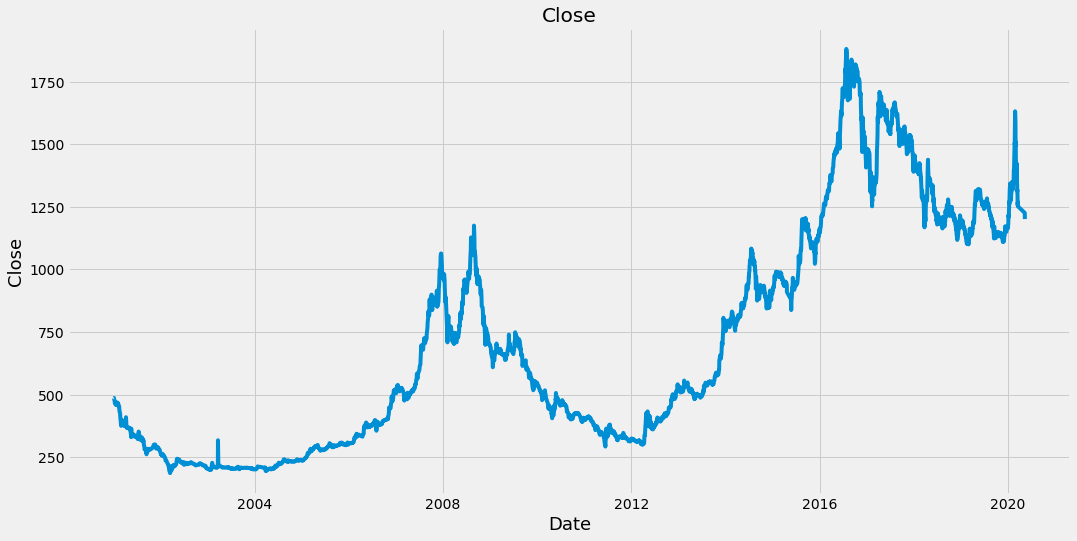

In [71]:
plt.figure(figsize=(16,8))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()

In [72]:
df.shape

(4480, 1)

In [73]:
data=df.filter (['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.80)
training_data_len

3584

In [74]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.17689045],
       [0.1771795 ],
       [0.1771677 ],
       ...,
       [0.62836901],
       [0.61344478],
       [0.59894528]])

In [91]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 50:
        print(x_train)
        print(y_train)
        print()

[array([0.17689045, 0.1771795 , 0.1771677 , 0.17459578, 0.1728438 ,
       0.17006542, 0.16645529, 0.16430809, 0.16302803, 0.16200752,
       0.16167128, 0.16080414, 0.16053869, 0.16107549, 0.16196622,
       0.16179515, 0.16466792, 0.1658359 , 0.16646119, 0.16626063,
       0.16564124, 0.16467972, 0.16298673, 0.16386567, 0.16200162,
       0.16075105, 0.15875132, 0.15652743, 0.15709373, 0.15167853,
       0.14935436, 0.14465884, 0.14425771, 0.14080685, 0.13501413,
       0.127611  , 0.124927  , 0.11153059, 0.1114598 , 0.11265728,
       0.1211458 , 0.12233148, 0.12211912, 0.12390059, 0.12469694,
       0.12365874, 0.12131687, 0.12072698, 0.12032586, 0.11926405])]
[0.11752387581626092]



In [92]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [93]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3534, 50, 1)

In [94]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [95]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
3534/3534 [==============================] - 133s 38ms/step - loss: 2.0378e-04
Epoch 2/10
3534/3534 [==============================] - 131s 37ms/step - loss: 1.5171e-04
Epoch 3/10
3534/3534 [==============================] - 129s 37ms/step - loss: 1.1953e-04
Epoch 4/10
3534/3534 [==============================] - 130s 37ms/step - loss: 9.7086e-05
Epoch 5/10
3534/3534 [==============================] - 136s 38ms/step - loss: 9.7579e-05
Epoch 6/10
3534/3534 [==============================] - 128s 36ms/step - loss: 8.3493e-05
Epoch 7/10
3534/3534 [==============================] - 131s 37ms/step - loss: 8.3631e-05
Epoch 8/10
3534/3534 [==============================] - 128s 36ms/step - loss: 7.1501e-05
Epoch 9/10
3534/3534 [==============================] - 131s 37ms/step - loss: 8.2648e-05
Epoch 10/10
3534/3534 [==============================] - 130s 37ms/step - loss: 6.6501e-05


In [109]:
#Create testing dataset
#create a new array containing scaled vales from index 1675 to 2168
test_data = scaled_data[training_data_len -50: , :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])


In [110]:
#Convert he data to a numpy array
x_test = np.array(x_test)

In [111]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [112]:
#Get the models predicte price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [113]:
#Get RMSE
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

25.35422249930246

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


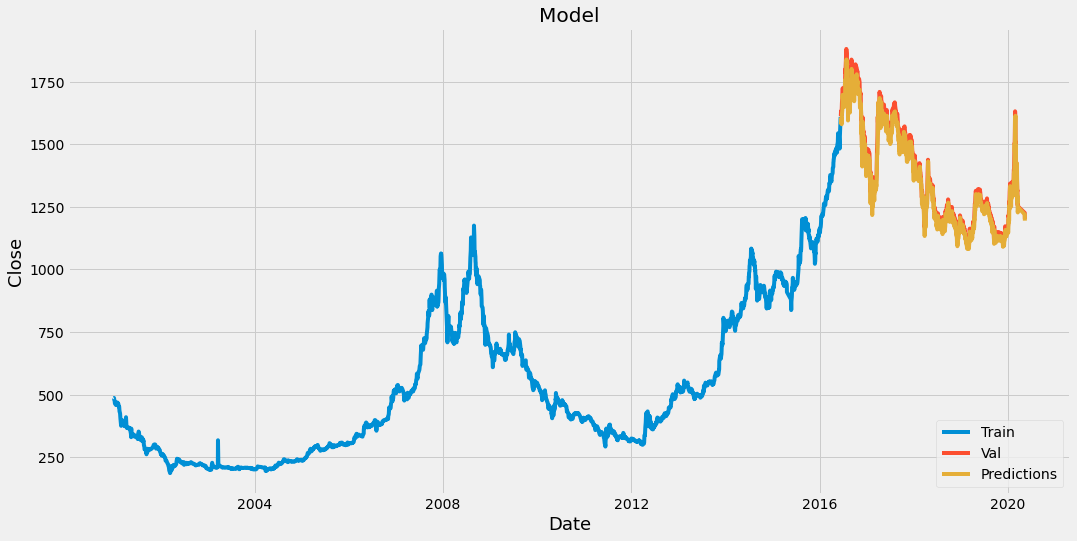

In [114]:
#Plot the data
train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [115]:
#show the valid and redicted prices
valid

,Close,Predictions
Date,,
2016-06-14,1614.15,1579.835083
2016-06-15,1620.47,1583.349365
2016-06-16,1632.94,1590.773071
2016-06-19,1622.27,1605.200806
2016-06-20,1615.10,1584.702515
...,...,...
2020-03-18,1255.80,1231.416870
2020-03-19,1269.30,1227.916748
2020-03-22,1251.45,1248.434692


In [116]:
nepse=pd.read_csv('Nepse.csv', parse_dates=['Date'])
nepse_quote=nepse[(nepse.Date<'5-13-2020')]
nepse_quote

,Date,Close
0,2001-01-01,486.09
1,2001-01-02,486.58
2,2001-01-03,486.56
3,2001-01-04,482.20
4,2001-01-05,479.23
...,...,...
4474,2020-03-17,1272.06
4475,2020-03-18,1255.80
4476,2020-03-19,1269.30
4477,2020-03-22,1251.45


In [119]:
#Get the quote
nepse=pd.read_csv('Nepse.csv',parse_dates=['Date'])
nepse_quote=nepse[(nepse.Date<'5-13-2020')]
#Create new dataframe
new_df = nepse_quote.filter(['Close'])
#Get the last 50 days closing price values and convert  the dataframe to an array
last_50_days = new_df[-50:].values
#Scale the data to be between 0 and 1
last_50_days_scaled= scaler.transform(last_50_days)
#Create an eppty list
X_test = []
#Append the past 50 days
X_test.append(last_50_days_scaled)
#Convert the X_test data ser to nmpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted price
pred_price =model.predict(X_test)
#undot he scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1195.1616]]


In [118]:
nepse_quote2=pd.read_csv('Nepse.csv',index_col=0, )
n1=nepse[(nepse.Date>'5-10-2020')]
n1

,Date,Close
4478,2020-05-12,1226.15
4479,2020-05-13,1201.57
